# Aula 8 - Revisão

Prof. Tiago Dias

[Linkedin](https://www.linkedin.com/in/diasctiago/) | [Github](https://github.com/diasctiago) | [Blog](https://www.dadosaocubo.com/)

### Documentações

1. [Documentação Pandas Plot](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html)
2. [Documentação Matplotlib](https://matplotlib.org/stable/tutorials/introductory/usage.html)
3. [Documentação Seaborn](https://seaborn.pydata.org/tutorial/introduction.html)
4. [Documentação Plotly Express](https://plotly.com/python-api-reference/plotly.express.html)
5. [Documentação Streamlit](https://docs.streamlit.io/library/api-reference)



### Instalação Bibliotecas

In [ ]:
# Instalando a biblioteca
!pip install pandas
!pip install seaborn
!pip install matplotlib
!pip install plotly
!pip install streamlit

### Importanto Bibliotecas

In [ ]:
# importando a biblioteca
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import streamlit as st

### Resolvendo Problemas com Gráficos

| ![pubi](https://drive.google.com/uc?id=12s3WH2lazCfJNkEhPH12y7kwzbs7U6Fp) |
|:--:| 
| **Figura 1** – _Fluxo de pensamento para gerar gráficos_ (Fonte da imagem: do autor) |

#### Base de Dados

In [ ]:
# base de dados de carros
mpg = sns.load_dataset('mpg')
mpg.head(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320


In [ ]:
# base de dados d voos
flights = sns.load_dataset('flights')
flights.head(2)

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118


#### Gráfico de Barras

* Comparativo entre dados categóricos
* Comparativos mensais e anuais
* Exemplo: Comparar o total de vendas por estado

In [ ]:
 # quantidade de carro por origem
mpg['origin'].value_counts()

usa       249
japan      79
europe     70
Name: origin, dtype: int64

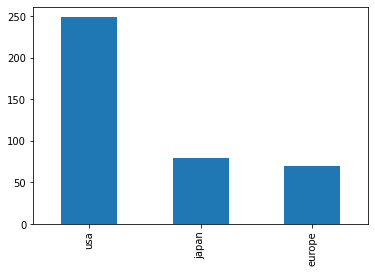

In [ ]:
# pandas
mpg['origin'].value_counts().plot.bar();

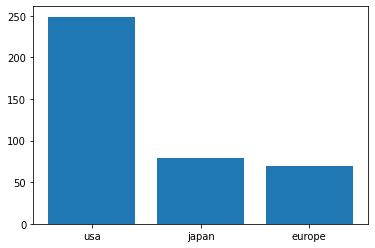

In [ ]:
# matplotlib
xbar = mpg['origin'].value_counts().index
ybar = mpg['origin'].value_counts().values
plt.bar(xbar,ybar)
plt.show()

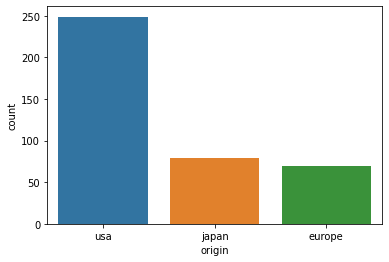

In [ ]:
# seaborn
sns.countplot(data=mpg, x='origin');

In [ ]:
# plotly
px.bar(data_frame=mpg, 
       x='origin', 
       color='origin',
       width=400, height=300)

#### Gráfico de Linhas

* Evolução de um atributo no tempo
* Demonstrar sequência de um valor durante anos, meses, semanas ou dias
* Exemplo: Vendas durante os meses de um determinado ano


In [ ]:
# evolução de voos por mês ao longo dos anos
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [ ]:
flights.pivot('year', 'month', 'passengers')

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336


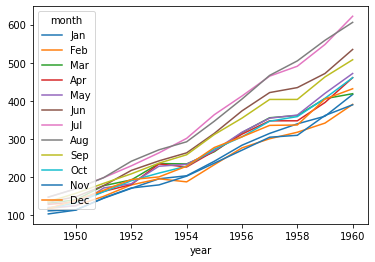

In [ ]:
# pandas
flights.pivot('year', 'month', 'passengers').plot.line();

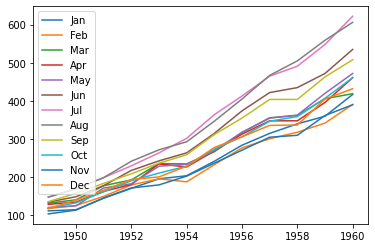

In [ ]:
# matplotlib
for m in flights.month.unique():
  xline = flights.pivot('year', 'month', 'passengers')[m].index
  yline = flights.pivot('year', 'month', 'passengers')[m].values
  plt.plot(xline, yline, label=m)
plt.legend()
plt.show()

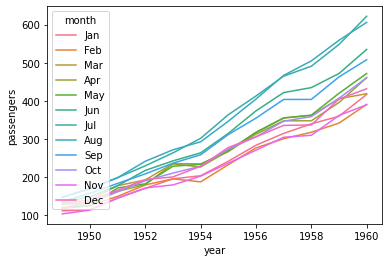

In [ ]:
# seaborn
sns.lineplot(data=flights,
             x='year',
             y='passengers',
             hue='month',
             estimator=sum);

In [ ]:
# plotly
px.line(data_frame=flights,
        x='year',
        y='passengers',
        line_group='month',
        color='month',
        width=400,
        height=300)

#### Gráfico de Área

* Similar ao gráfico de linha
* Evidencia uma noção de proporção sobre o todo com a área desenhada
* Exemplo: Desconto em compras por meses


In [ ]:
# evolução de voos por mês ao longo dos anos
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


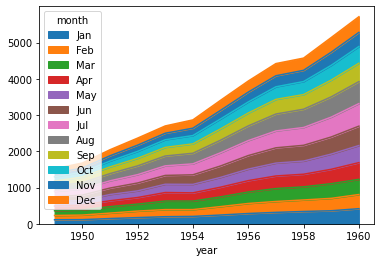

In [ ]:
# pandas
flights.pivot('year', 'month', 'passengers').plot.area();

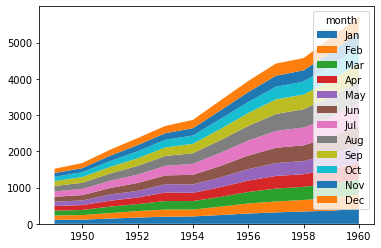

In [ ]:
# matplotlib
plt.stackplot(flights.pivot('year', 'month', 'passengers').index,
              flights.pivot('year', 'month', 'passengers')['Jan'],
              flights.pivot('year', 'month', 'passengers')['Feb'],
              flights.pivot('year', 'month', 'passengers')['Mar'],
              flights.pivot('year', 'month', 'passengers')['Apr'],
              flights.pivot('year', 'month', 'passengers')['May'],
              flights.pivot('year', 'month', 'passengers')['Jun'],
              flights.pivot('year', 'month', 'passengers')['Jul'],
              flights.pivot('year', 'month', 'passengers')['Aug'],
              flights.pivot('year', 'month', 'passengers')['Sep'],
              flights.pivot('year', 'month', 'passengers')['Oct'],
              flights.pivot('year', 'month', 'passengers')['Nov'],
              flights.pivot('year', 'month', 'passengers')['Dec'],
              labels=['Jan','Feb','Mar','Apr','May','Jun',
                      'Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='month')
plt.show()

In [ ]:
# plotly
px.area(data_frame=flights,
        x='year',
        y='passengers',
        line_group='month',
        color='month',
        width=400, height=300)

#### Gráfico de Dispersão

* Visão de comparação entre duas variáveis
* Indica o quantos uma variável pode ou não influenciar a outra
* Exemplo: Tempo de profissão e salário

In [ ]:
# potência x aceleração dos carros
mpg[['horsepower', 'acceleration']].head(3)

,horsepower,acceleration
0,130.0,12.0
1,165.0,11.5
2,150.0,11.0


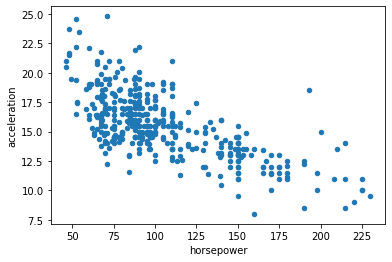

In [ ]:
# pandas
mpg.plot.scatter(x='horsepower',y='acceleration');

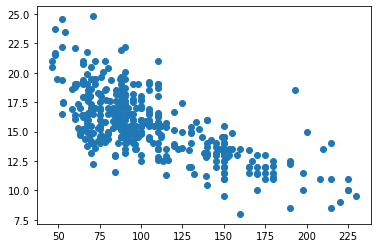

In [ ]:
# matplotlib
xscatter = mpg['horsepower']
yscatter = mpg.acceleration
plt.scatter(xscatter, yscatter)
plt.show()

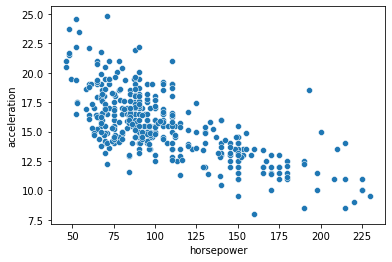

In [ ]:
# seaborn
sns.scatterplot(data=mpg,
                x='horsepower',
                y='acceleration');

In [ ]:
# plotly
px.scatter(data_frame=mpg,
           x='horsepower',
           y='acceleration',
           width=400, height=300)

#### Gráfico de Pizza

* Visão de um atributo comparado com o todo
* É o valor relativo de cada categoria analizada
* Exemplo: Proporção de vendas por produto


In [ ]:
# percentual de carros por origem
round(mpg['origin'].value_counts()/len(mpg)*100,1)

usa       62.6
japan     19.8
europe    17.6
Name: origin, dtype: float64

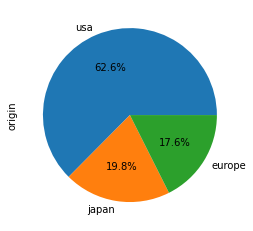

In [ ]:
# pandas
mpg['origin'].value_counts().plot.pie(autopct='%1.1f%%');

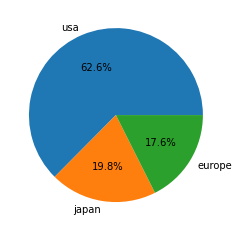

In [ ]:
# matplotlib
valores_pie = mpg['origin'].value_counts().values
sabores_pie = mpg['origin'].value_counts().index
plt.pie(valores_pie, labels=sabores_pie, autopct='%1.1f%%')
plt.show()

In [ ]:
# plotly
px.pie(data_frame=mpg,
       names='origin',
       width=400, height=300)

#### Gráfico de Caixa

* Visão de distribuição de uma variável
* Identificação de outliers
* Apresenta algumas respostas importantes sobre o dado em análise
* Exemplo: A distribuição dos salários em uma empresa

In [ ]:
# dispersão dos dados de potência dos carros
mpg.horsepower

0      130.0
1      165.0
2      150.0
3      150.0
4      140.0
       ...  
393     86.0
394     52.0
395     84.0
396     79.0
397     82.0
Name: horsepower, Length: 398, dtype: float64

In [ ]:
mpg.horsepower.min(), mpg.horsepower.max()

(46.0, 230.0)

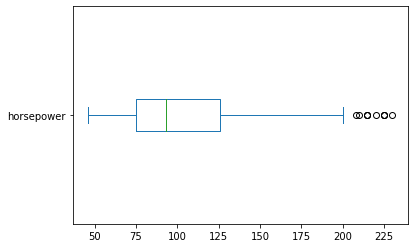

In [ ]:
# pandas
mpg.horsepower.plot.box(vert=False);

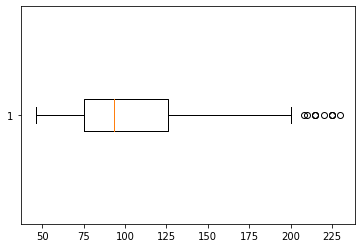

In [ ]:
# matplolib
plt.boxplot(mpg.dropna().horsepower, vert=False)
plt.show()

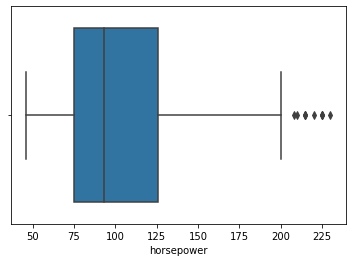

In [ ]:
# seaborn
sns.boxplot(data=mpg, x='horsepower');

In [ ]:
# plotly
px.box(data_frame=mpg,
       x='horsepower',
       width=400,height=300)

#### Histograma

* Visão de distribuição de uma variável
* Analisa a frequência/quantidade de uma coluna
* Similar ao gráfico de coluna, mas busca responder perguntas sobre a distribuição
* Exemplo: Faixa etária dos inscritos no enem 

In [ ]:
# verificando o aceleração dos carros
mpg['acceleration']

0      12.0
1      11.5
2      11.0
3      12.0
4      10.5
       ... 
393    15.6
394    24.6
395    11.6
396    18.6
397    19.4
Name: acceleration, Length: 398, dtype: float64

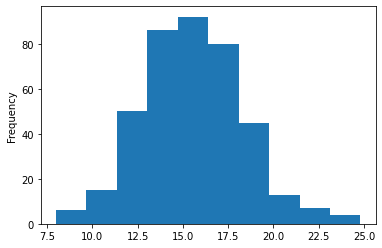

In [ ]:
# pandas
mpg['acceleration'].plot.hist();

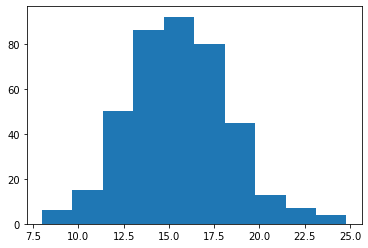

In [ ]:
# matplotlib
plt.hist(mpg['acceleration'])
plt.show()

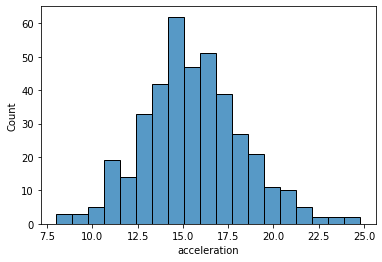

In [ ]:
# seaborn
sns.histplot(data=mpg, x='acceleration');

In [ ]:
# plotly
px.histogram(data_frame=mpg,
             x='acceleration',
             width=400,height=300)

### Resumo Gráficos Python

| ![pubi](https://drive.google.com/uc?id=1AnSWxCC0cupQHRxsTgXXGkZ-cqHjHF9M) |
|:--:| 
| **Figura 1** – _Resumo gráficos_ (Fonte da imagem: do autor) |

### Streamlit

Framework para criação de aplicações web de forma simples para soluções com dados.

In [ ]:
# escrevendo título
st.title()
st.header()

In [ ]:
# escrevendo subtitulo
st.subheader()

In [ ]:
# escrevendo texto
st.write()

In [ ]:
# escrevendo com linguagem markdown
st.markdown()

In [ ]:
# exibindo um dataframe
st.dataframe()

In [ ]:
# exibindo uma tabela
st.table()

In [ ]:
# plotando um gráfico matplotlib
fig, ax = plt.subplots()
ax.hist()
st.pyplot(fig)

In [ ]:
# plotando um gráfico seaborn
fig, ax = plt.subplots()
sns.histplot(ax=ax)
st.pyplot(fig)

In [ ]:
# plotando um gráfico plotly
fig = px.hisogram()
st.plotly_chart(fig)

In [ ]:
# criando um botão
st.button()

In [ ]:
# criando um checkbox
st.checkbox()

In [ ]:
# criando um selectbox
st.selectbox()

In [ ]:
# criando um input de texto do usuário
st.text_input()

In [ ]:
# carregando uma imagem na página
st.image()